In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
heartdata = pd.read_csv('selected_heartdata.csv')
heartdata.head()

,HeartDisease,GenHealth,DiffWalking,Stroke,PhysicalHealth
0,0,3,0,0,3.0
1,0,3,0,1,0.0
2,0,2,0,0,0.0
3,0,1,0,0,0.0
4,0,2,1,0,0.0


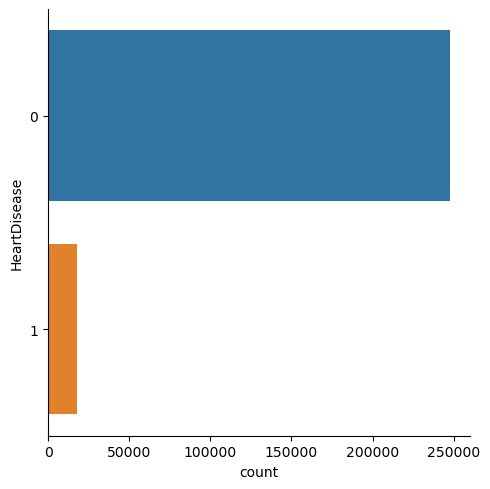

In [3]:
sb.catplot(y = "HeartDisease", data = heartdata, kind = "count")

In [4]:
y = heartdata["HeartDisease"]
X = heartdata[["GenHealth","DiffWalking","Stroke","PhysicalHealth"]]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


TPR Train :	 0.024413145539906103
TNR Train :	 0.9983555291960964

FPR Train :	 0.0016444708039035963
FNR Train :	 0.9755868544600939


<Axes: >

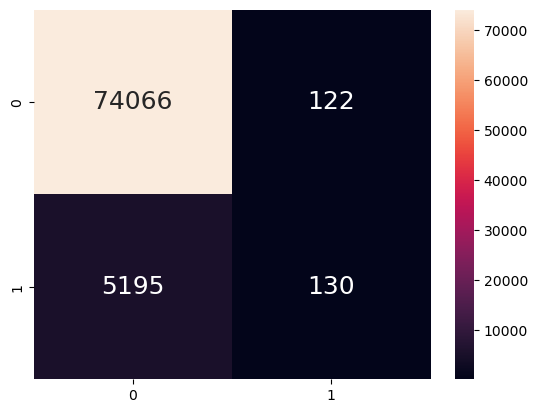

In [6]:
from sklearn.metrics import confusion_matrix

cmTest = confusion_matrix(y_test, y_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTest/(tpTest + fnTest)))
print("TNR Train :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Train :\t", (fpTest/(tnTest + fpTest)))
print("FNR Train :\t", (fnTest/(tpTest + fnTest)))

sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [7]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [9]:
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('f1_score: %.2f' % f1_score(y_test, y_pred))

precision: 0.52
recall: 0.02
f1_score: 0.05


The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
The recall is intuitively the ability of the classifier to find all the positive samples.
The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. 

This shows that the model is very bad at finding all the postiive samples and ingeneral terrible this is due to the data set being imbalance